# 1. Classification

Presentation of some algorithms. We will here use some classifiers commonly used. The classifiers we compare here are the following :
- [The K-Nearest Neighbors (KNN) Classifier](#1.1-K-Nearest-Neighbors)
- [Support Vector Machine (SVM)](#1.2-Support-Vector-Machine)
- [Gaussian Process Classifier](#1.3-Gaussian-Process-Classifier)
- [Decision Tree Classifier](#1.4-Decision-Tree-Classifier)
- [Random Forest Classifier](#1.5-Random-Forest-Classifier)
- [The Ada Boost Classifier](#1.6-Ada-Boost-Classifier)
- [Naive Bayes Classifier](#1.7-Naive-Bayes-Classifier)


## 1.1 K-Nearest Neighbors
...

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

from lblearn.datasets import load_galaxies

In [ ]:
galaxies = load_galaxies(n_samples=150)  # 150 of each species
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = KNeighborsClassifier(3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_pred=predictions, y_true=y_test))
print(np.sum(predictions == y_test)/len(y_test))

The accuracy is better than random, but is still poor. To improve it, we can try to change some hyperparameters, such as the number of neighbor. Before doing so, we first try to scale the data. Indeed, the column `NVOTE`has large values whereas all the others are probabilities ranging from 0 to 1.  

In [ ]:
galaxies = load_galaxies(n_samples=150)  # 150 of each species
X, y = galaxies.data, galaxies.target

scaler = MinMaxScaler()
scaler_test = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scaler.fit(X_train[:, 0].reshape(-1, 1))  
X_train[:, 0] = scaler.transform(X_train[:, 0].reshape(-1, 1)).flatten()  # All data is between 0 and 1 but NVOTE
scaler_test.fit(X_test[:, 0].reshape(-1, 1))  
X_test[:, 0] = scaler_test.transform(X_test[:, 0].reshape(-1, 1)).flatten()

model = KNeighborsClassifier(7)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_pred=predictions, y_true=y_test)
print(score)
print(np.sum(predictions == y_test)/len(y_test))

The accuracy score is a precious indicator on the performance of our model. However it does not indicate where the model has gone wrong. A good alternative to it is the confusion matrix:

In [ ]:
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"KNN, accuracy ={score: .2f}");

Sklearn also implements grid search methods to find the best set of parameters for our model:

In [12]:
from sklearn.model_selection import GridSearchCV

In [ ]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()
scaler_test = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scaler.fit(X_train[:, 0].reshape(-1, 1))  
X_train[:, 0] = scaler.transform(X_train[:, 0].reshape(-1, 1)).flatten()  # All data is between 0 and 1 but NVOTE
scaler_test.fit(X_test[:, 0].reshape(-1, 1))  
X_test[:, 0] = scaler_test.transform(X_test[:, 0].reshape(-1, 1)).flatten()

classifier = KNeighborsClassifier()
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=3)

# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)
grid_search.best_params_

Altough the sklearn API is nicely designed and quite intuitive, adding all these steps can become quite tedious. This is particularly true when changing the type of classifier, all the lines have to be rewritten. Luckily enough, sklearn provide a nice way to overcome this difficulty: the pipelines

In [5]:
from sklearn.pipeline import make_pipeline

In [ ]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = KNeighborsClassifier(7)
clf = make_pipeline(MinMaxScaler(), classifier)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"KNN, accuracy ={score: .2f}");

## 1.2 Support Vector Machine
...

In [ ]:
from sklearn.svm import SVC

In [ ]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()
scaler_test = MinMaxScaler()

scaler.fit(X_train[:, 0].reshape(-1, 1))  
X_train[:, 0] = scaler.transform(X_train[:, 0].reshape(-1, 1)).flatten()  # All data is between 0 and 1 but NVOTE
scaler_test.fit(X_test[:, 0].reshape(-1, 1))  
X_test[:, 0] = scaler_test.transform(X_test[:, 0].reshape(-1, 1)).flatten()

classifier = SVC()
param_grid = [
  {'C': [1, 10, 100, 1000, 1500, 10_000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000, 1500, 10_000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ] 

grid = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)

# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = SVC(kernel='linear', C=1000)
clf = make_pipeline(MinMaxScaler(), classifier)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"SVC, accuracy ={score: .2f}");

## 1.3 Gaussian Process Classifier
...

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

In [ ]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()
scaler_test = MinMaxScaler()

scaler.fit(X_train[:, 0].reshape(-1, 1))  
X_train[:, 0] = scaler.transform(X_train[:, 0].reshape(-1, 1)).flatten()  # All data is between 0 and 1 but NVOTE
scaler_test.fit(X_test[:, 0].reshape(-1, 1))  
X_test[:, 0] = scaler_test.transform(X_test[:, 0].reshape(-1, 1)).flatten()

classifier = GaussianProcessClassifier()

param_grid = [{
    "kernel": [RBF(l) for l in np.logspace(-1, 1, 10)]
}, {
    "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, 10)]
}]

grid = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1, n_jobs=-1)

# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = GaussianProcessClassifier(DotProduct(0.1))
clf = make_pipeline(MinMaxScaler(), classifier)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"Gaussian process, accuracy ={score: .2f}");

## 1.4 Decision Tree Classifier
...

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()
scaler_test = MinMaxScaler()

scaler.fit(X_train[:, 0].reshape(-1, 1))  
X_train[:, 0] = scaler.transform(X_train[:, 0].reshape(-1, 1)).flatten()  # All data is between 0 and 1 but NVOTE
scaler_test.fit(X_test[:, 0].reshape(-1, 1))  
X_test[:, 0] = scaler_test.transform(X_test[:, 0].reshape(-1, 1)).flatten()

classifier = DecisionTreeClassifier()

param_grid = [
    {'criterion': ['entropy', 'gini', 'log_loss'], 'max_depth': list(range(5, 30))}
             ]

grid = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1, n_jobs=-1)

# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits


{'criterion': 'entropy', 'max_depth': 18}

[[22  0  6]
 [ 0 32  1]
 [ 4  2 23]]


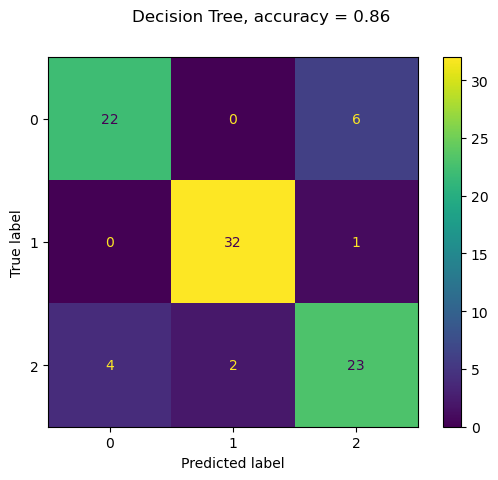

In [10]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=18)
clf = make_pipeline(MinMaxScaler(), classifier)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"Decision Tree, accuracy ={score: .2f}");

## 1.5 Random Forest Classifier
...

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()
scaler_test = MinMaxScaler()

scaler.fit(X_train[:, 0].reshape(-1, 1))  
X_train[:, 0] = scaler.transform(X_train[:, 0].reshape(-1, 1)).flatten()  # All data is between 0 and 1 but NVOTE
scaler_test.fit(X_test[:, 0].reshape(-1, 1))  
X_test[:, 0] = scaler_test.transform(X_test[:, 0].reshape(-1, 1)).flatten()

classifier = RandomForestClassifier()

param_grid = [
    {'criterion': ['entropy', 'gini', 'log_loss'], 'max_depth': list(range(20, 40)),
     'n_estimators' : [20, 30]
    }
             ]

grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy', return_train_score=True, verbose=1, n_jobs=-1)

# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


{'criterion': 'log_loss', 'max_depth': 34, 'n_estimators': 20}

[[27  0  1]
 [ 0 32  1]
 [ 3  1 25]]


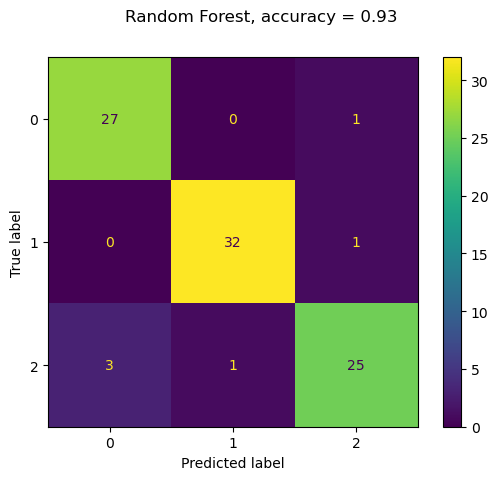

In [29]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=34)
clf = make_pipeline(MinMaxScaler(), classifier)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"Random Forest, accuracy ={score: .2f}");

## 1.6 Perceptron
...

In [2]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline

In [15]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

param_grid = [{
    'clf__tol': [1e-1, 1e-3, 1e-5],
    'clf__penalty': ['l2', 'l1', 'elasticnet'],
    'clf__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'clf__eta0': [1e-4, 1e-3, 1e-2, 1e-1, 1]
}]


pipe = Pipeline([('scale', StandardScaler()), ('clf', Perceptron())])

grid = GridSearchCV(pipe, param_grid,scoring='accuracy', cv=5, return_train_score=True, verbose=1, n_jobs=-1)

grid_search = grid.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


{'clf__alpha': 0.001,
 'clf__eta0': 0.0001,
 'clf__penalty': 'l1',
 'clf__tol': 0.1}

[[13  0 15]
 [ 0 33  0]
 [ 0  8 21]]


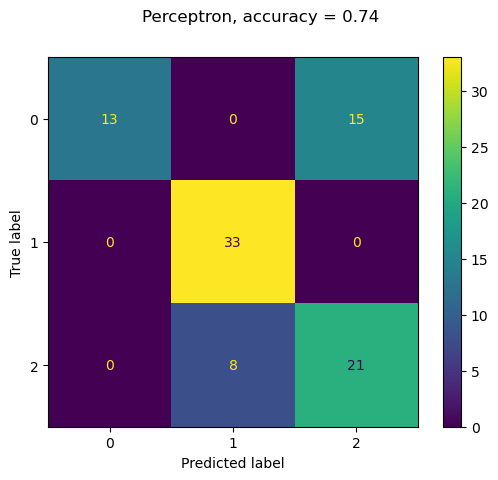

In [16]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = Perceptron(alpha=0.001, eta0=0.0001, penalty='l1', tol=0.1)
clf = make_pipeline(MinMaxScaler(), classifier)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"Perceptron, accuracy ={score: .2f}");

## 1.8 Ada Boost Classifier
...

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

pipe = Pipeline([('scale', StandardScaler()), ('clf', AdaBoostClassifier(estimator=DecisionTreeClassifier()))])

param_grid = {'clf__estimator__max_depth':list(range(1, 30)),
              'clf__estimator__criterion':['entropy', 'gini', 'log_loss'],
              'clf__n_estimators':[10, 50, 250, 1000],
              'clf__learning_rate':[0.01, 0.1]} 


grid = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, return_train_score=True, verbose=1, n_jobs=-1)

grid_search = grid.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 696 candidates, totalling 3480 fits


{'clf__estimator__criterion': 'log_loss',
 'clf__estimator__max_depth': 3,
 'clf__learning_rate': 0.1,
 'clf__n_estimators': 250}

[[22  0  6]
 [ 0 28  5]
 [ 4  2 23]]


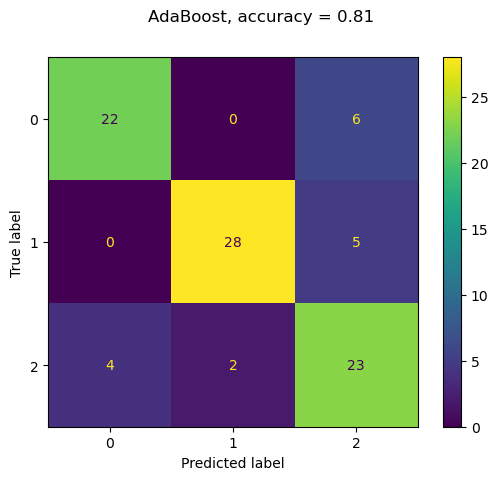

In [22]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3), learning_rate=0.1, n_estimators=250)
clf = make_pipeline(MinMaxScaler(), classifier)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"AdaBoost, accuracy ={score: .2f}");

## 1.9  Multi Layer Perceptron 

...

In [3]:
from sklearn.neural_network import MLPClassifier

In [19]:
galaxies = load_galaxies(n_samples=10000)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('mlp', MLPClassifier())
])

# Définition des paramètres pour la recherche de grille
parameters = {
    'mlp__hidden_layer_sizes': [(32, 32), (50, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__max_iter': [3000, 4000, 5000]
}

# Création de l'estimateur GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=2, return_train_score=True, verbose=3, n_jobs=-1)

# Entrainement sur les données
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et score
print("Meilleurs paramètres: ", grid_search.best_params_)
print("Score de la meilleure configuration: ", grid_search.best_score_)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 2/2] END mlp__activation=sigmoid, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate=adaptive, mlp__max_iter=3000, mlp__solver=adam;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/2] END mlp__activation=sigmoid, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate=adaptive, mlp__max_iter=4000, mlp__solver=sgd;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/2] END mlp__activation=sigmoid, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate=adaptive, mlp__max_iter=4000, mlp__solver=sgd;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/2] END mlp__activation=sigmoid, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate=adaptive, mlp__max_iter=4000, mlp__solver=adam;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/2] END mlp__activation=sigmoid, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate=adapti

In [ ]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3), learning_rate=0.1, n_estimators=250)
clf = make_pipeline(MinMaxScaler(), classifier)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle(f"AdaBoost, accuracy ={score: .2f}");

## 1.9 Naive Bayes Classifier
...

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

In [ ]:
galaxies = load_galaxies(n_samples=100)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()] #, CategoricalNB()]


for classifier in classifiers:
    # pipeline = Pipeline([('scale', MinMaxScaler()), ('clf', classifier)])
    clf = make_pipeline(MinMaxScaler(), classifier)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    print(confusion_matrix(y_test, predictions))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    disp.figure_.suptitle(f"{classifier.__class__.__name__}, accuracy ={score: .2f}");

In [4]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [7]:
from lblearn.datasets import load_galaxies

galaxies = load_galaxies(n_samples=150)
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
dataset = {}
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    # disp = ConfusionMatrixDisplay.from_predictions
    cm = confusion_matrix(y_test, predicted)

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
    y_true = []
    y_pred = []
    for gt in range(len(cm)):
        for pred in range(len(cm)):
            y_true += [gt] * cm[gt][pred]
            y_pred += [pred] * cm[gt][pred]

    print(
        f"Classification report rebuilt from confusion matrix for {name}:\n"
        f"{classification_report(y_true, y_pred)}\n"
    )
    score = accuracy_score(y_test, y_pred)
    dataset[name] = score

Classification report rebuilt from confusion matrix for Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        66
           1       0.78      0.90      0.84        51
           2       0.72      0.62      0.67        63

    accuracy                           0.78       180
   macro avg       0.78      0.79      0.78       180
weighted avg       0.78      0.78      0.78       180


Classification report rebuilt from confusion matrix for Linear SVM:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        66
           1       0.76      1.00      0.86        51
           2       0.76      0.59      0.66        63

    accuracy                           0.78       180
   macro avg       0.78      0.80      0.78       180
weighted avg       0.78      0.78      0.78       180


Classification report rebuilt from confusion matrix for RBF SVM:
              precision    r

In [8]:
dataset = dict(reversed(sorted(dataset.items(), key=lambda item: item[1])))

In [9]:
import pandas as pd
from IPython.display import display, HTML
# Créer un dataframe de test
#df = pd.DataFrame({'Nom': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]})
df_scores = pd.DataFrame(dataset.items(), columns=['Algorithm', 'Score'])
# Afficher le dataframe en Markdown
df_scores

,Algorithm,Score
0,QDA,0.388889
1,Naive Bayes,0.388889
2,RBF SVM,0.388889
3,Nearest Neighbors,0.388889
4,Neural Net,0.383333
5,Gaussian Process,0.383333
6,Random Forest,0.377778
7,Decision Tree,0.377778
8,Linear SVM,0.372222
9,AdaBoost,0.366667


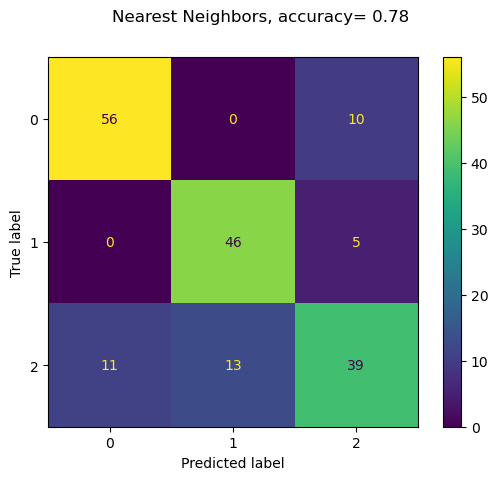

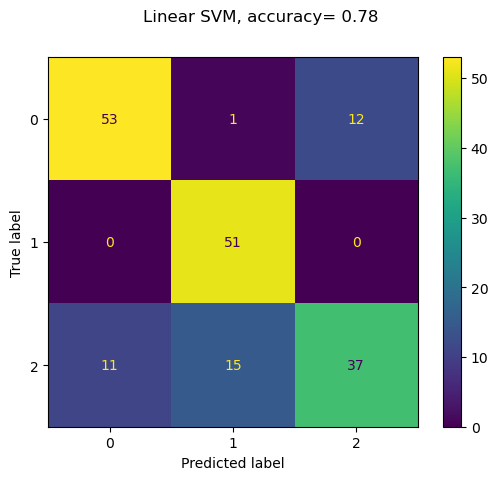

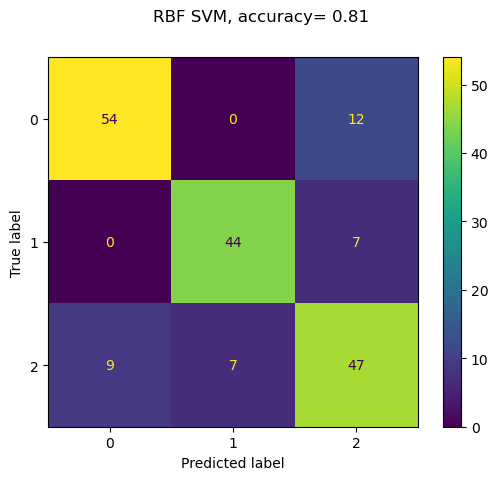

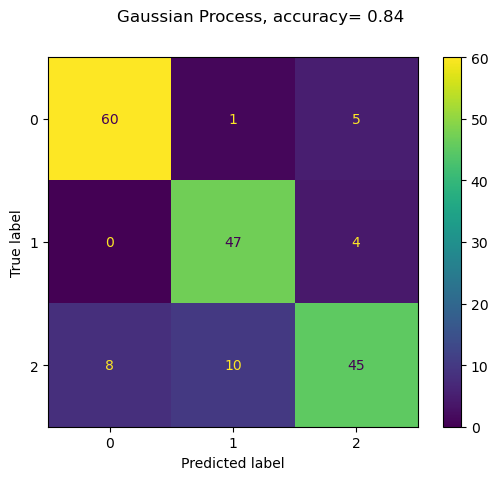

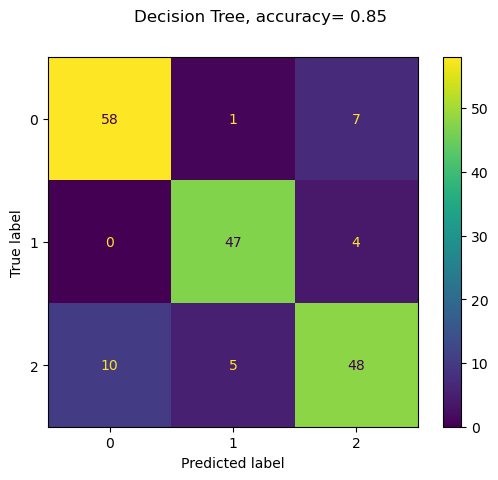

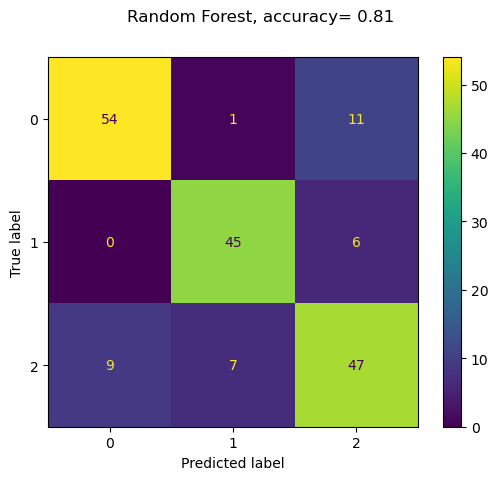

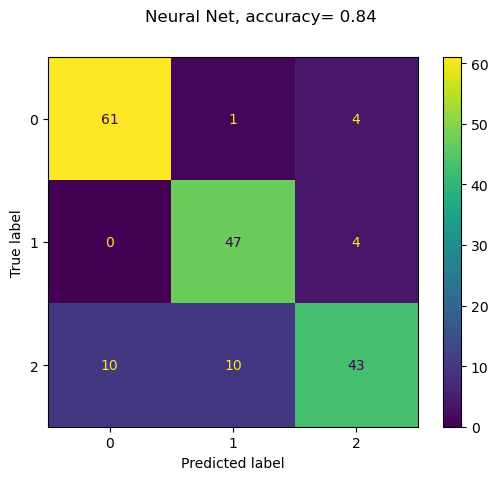

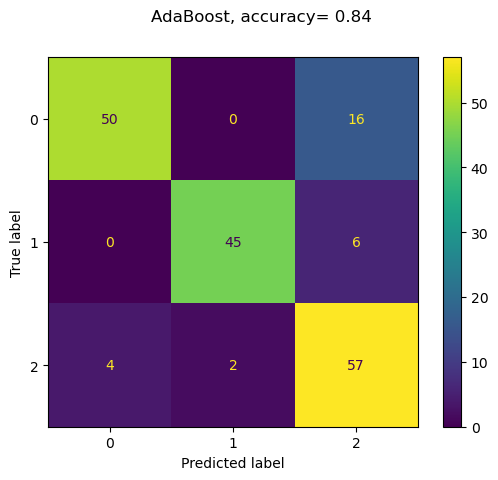

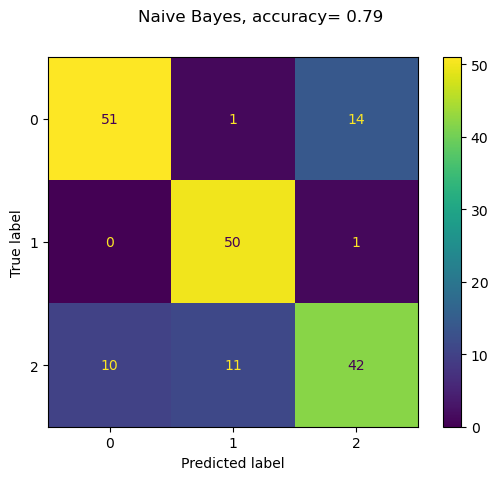

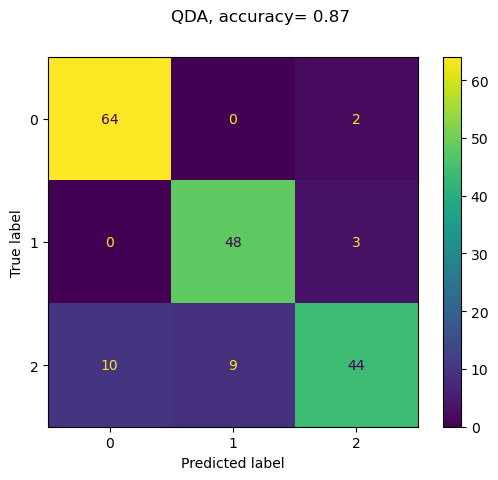

In [10]:
# preprocess dataset, split into training and test part
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    #print(f"Confusion matrix:\n{disp.confusion_matrix}")
    disp.figure_.suptitle(f"{name}, accuracy={score: .2f}");
    #plt.imshow(confusion_matrix(y_test, y_pred),cmap='Blues', interpolation='nearest')
    #plt.grid(False)
    #plt.ylabel('True')
    #plt.xlabel('Predicted');

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,[11] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature.[12] The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).

In [ ]:
figure = plt.figure(figsize=(27, 9))
i = 1
x_index = 5
y_index = 7
# preprocess dataset, split into training and test part
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, x_index], X_train[:, y_index], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, x_index], X_test[:, y_index], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
#ax.set_xlim(x_min, x_max)
#ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
i += 1

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #DecisionBoundaryDisplay.from_estimator(
        #clf, X[:, 2:4], cmap=cm, alpha=0.8, ax=ax, eps=0.5
    #)

    # Plot the training points
    ax.scatter(
        X_train[:, x_index], X_train[:, y_index], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, x_index],
        X_test[:, y_index],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    #ax.set_xlim(x_min, x_max)
    #ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(
        x_max - 0.3,
        y_min + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    i += 1

plt.tight_layout()
plt.show()